35 images in D:/FlagDetectionDatasets/ExportedDatasetsExtracted\Job_56_illum.


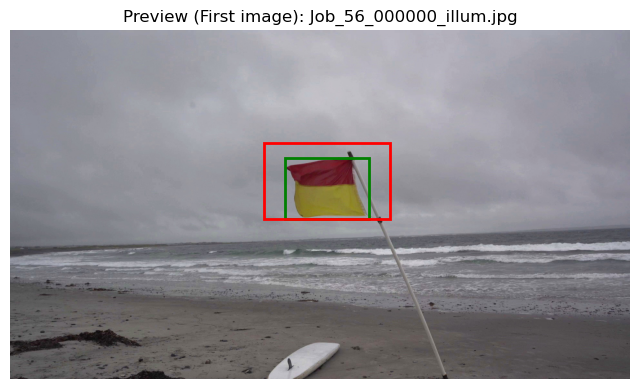

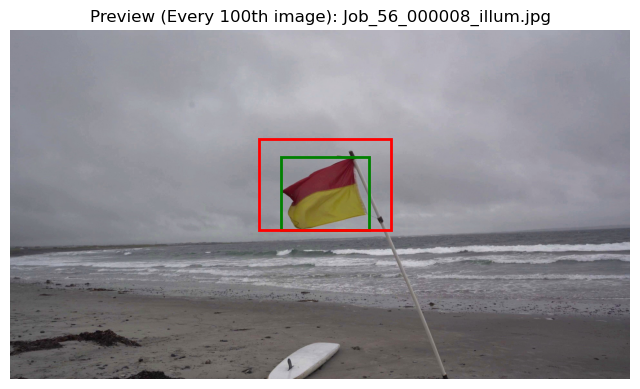

Similarity between Job_56_000000_illum.jpg and Job_56_000008_illum.jpg: 0.73
  --- Images are dissimilar. Copying Job_56_000008_illum.jpg to output folder.
Similarity between Job_56_000008_illum.jpg and Job_56_000016_illum.jpg: 0.81
Similarity between Job_56_000016_illum.jpg and Job_56_000024_illum.jpg: 0.77
Similarity between Job_56_000024_illum.jpg and Job_56_000032_illum.jpg: 0.73
  --- Images are dissimilar. Copying Job_56_000032_illum.jpg to output folder.
Similarity between Job_56_000032_illum.jpg and Job_56_000040_illum.jpg: 0.81
Similarity between Job_56_000040_illum.jpg and Job_56_000048_illum.jpg: 0.75
  --- Images are dissimilar. Copying Job_56_000048_illum.jpg to output folder.
Similarity between Job_56_000048_illum.jpg and Job_56_000056_illum.jpg: 0.79
Similarity between Job_56_000056_illum.jpg and Job_56_000064_illum.jpg: 0.72
  --- Images are dissimilar. Copying Job_56_000064_illum.jpg to output folder.
Similarity between Job_56_000064_illum.jpg and Job_56_000072_illum.j

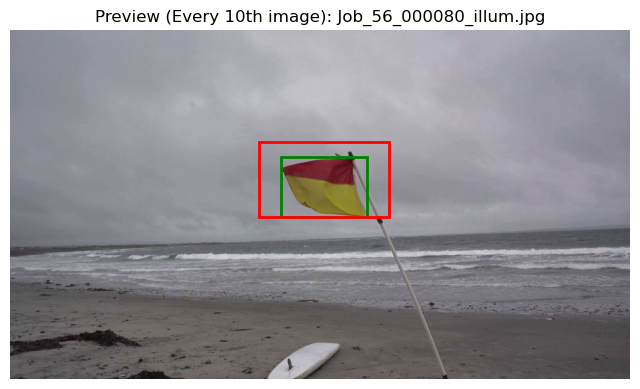

Similarity between Job_56_000072_illum.jpg and Job_56_000080_illum.jpg: 0.75
  --- Images are dissimilar. Copying Job_56_000080_illum.jpg to output folder.
Similarity between Job_56_000080_illum.jpg and Job_56_000088_illum.jpg: 0.76
Similarity between Job_56_000088_illum.jpg and Job_56_000096_illum.jpg: 0.75
  --- Images are dissimilar. Copying Job_56_000096_illum.jpg to output folder.
Similarity between Job_56_000096_illum.jpg and Job_56_000104_illum.jpg: 0.78
Similarity between Job_56_000104_illum.jpg and Job_56_000112_illum.jpg: 0.72
  --- Images are dissimilar. Copying Job_56_000112_illum.jpg to output folder.
Similarity between Job_56_000112_illum.jpg and Job_56_000120_illum.jpg: 0.73
  --- Images are dissimilar. Copying Job_56_000120_illum.jpg to output folder.
Similarity between Job_56_000120_illum.jpg and Job_56_000128_illum.jpg: 0.74
  --- Images are dissimilar. Copying Job_56_000128_illum.jpg to output folder.
Similarity between Job_56_000128_illum.jpg and Job_56_000136_illum

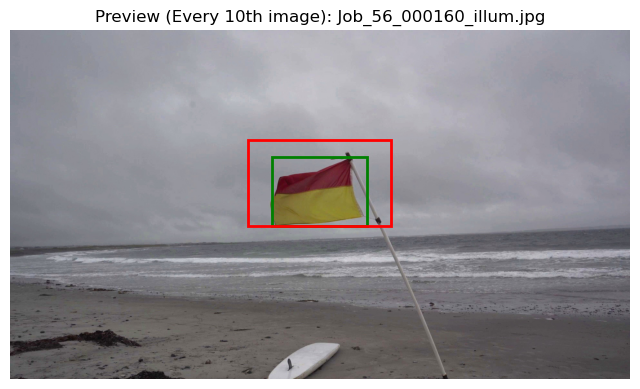

Similarity between Job_56_000152_illum.jpg and Job_56_000160_illum.jpg: 0.79
Similarity between Job_56_000160_illum.jpg and Job_56_000168_illum.jpg: 0.75
Similarity between Job_56_000168_illum.jpg and Job_56_000176_illum.jpg: 0.82
Similarity between Job_56_000176_illum.jpg and Job_56_000184_illum.jpg: 0.77
Similarity between Job_56_000184_illum.jpg and Job_56_000192_illum.jpg: 0.77
Similarity between Job_56_000192_illum.jpg and Job_56_000200_illum.jpg: 0.79
Similarity between Job_56_000200_illum.jpg and Job_56_000208_illum.jpg: 0.77
Similarity between Job_56_000208_illum.jpg and Job_56_000216_illum.jpg: 0.79
Similarity between Job_56_000216_illum.jpg and Job_56_000224_illum.jpg: 0.77
Similarity between Job_56_000224_illum.jpg and Job_56_000232_illum.jpg: 0.80


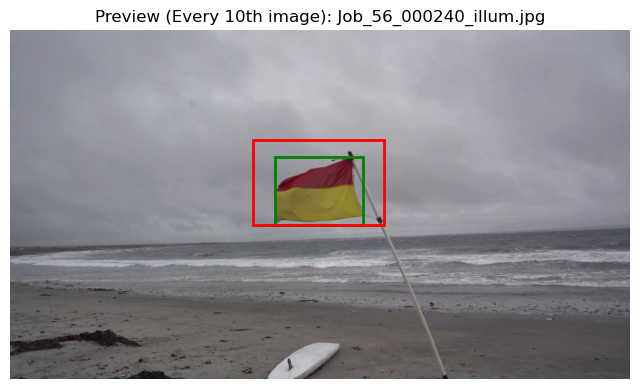

Similarity between Job_56_000232_illum.jpg and Job_56_000240_illum.jpg: 0.80
Similarity between Job_56_000240_illum.jpg and Job_56_000248_illum.jpg: 0.83
Similarity between Job_56_000248_illum.jpg and Job_56_000256_illum.jpg: 0.82
Similarity between Job_56_000256_illum.jpg and Job_56_000264_illum.jpg: 0.74
  --- Images are dissimilar. Copying Job_56_000264_illum.jpg to output folder.
Similarity between Job_56_000264_illum.jpg and Job_56_000272_illum.jpg: 0.79
Images before comparison: 35, after comparison: 35
Finished comparing and filtering out dissimilar images. Filtered: 11


In [51]:
# A_SSIM_CompareRegions.ipynb
# Processes a dataset of images and their bounding box annotations to adjust bounding boxes, filter out similar images, and preview the results. 
# Modifies Bounding boxes by expanding or contracting them using user-defined percentages for left/right and top/bottom padding.
# Compares Regions: corresponding to bounding boxes in consecutive images using the Structural Similarity Index (SSIM). This helps measure how visually similar the regions are.
# Preview Adjustments:
# The script displays the first image (and some subsequent images at intervals) with the original and adjusted bounding boxes overlaid to visualize the changes.
# Filter Dissimilar Images:
# If the similarity between the regions of two consecutive images is below a specified threshold, the current image and its annotation are saved in an output folder. Otherwise, the image is excluded from the output.
# Output Organized Dataset:
# Images and their annotations that pass the filtering criteria are copied to a new output directory for further use.
# Incremental Analysis:
# The script processes the dataset sequentially, ensuring that the first image in each sequence always serves as the reference for comparisons. For each pair of images, the adjusted bounding box is used for comparison.
# This script is useful for reducing redundant or similar images in a dataset while maintaining only diverse and distinct samples, which can help in machine learning tasks like object detection.

import os
import cv2
import shutil
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import csv

def write_summary_to_csv(output_csv, job, initial_count, final_count, class_value):
    """
    Write summary information to a CSV file.
    """
    #filename = f'SSIM_Summary_Threshold_{threshold_str}.csv'
    #df.to_csv(filename, index=False)
    #df.to_csv('SSIM_Summary.csv', index=False)
    #print(f"CSV file {filename} has been created.")

    file_exists = os.path.exists(output_csv)

    # Append mode with headers if file doesn't exist
    with open(output_csv, mode='a', newline='') as csvfile:
        writer = csv.writer(csvfile)

        # Write header if the file is newly created
        if not file_exists:
            writer.writerow(["Job", "Initial Count", "Final Count", "Class ID", "Threshold"])

        # Write the data row
        writer.writerow([job, initial_count, final_count, class_value, threshold])

def adjust_bounding_box(x_center, y_center, width, height, image_width, image_height, lr_padding, tb_padding):
    """
    Adjust the bounding box based on the padding percentages.
    """
    x_min = max(0, int((x_center - width / 2 - lr_padding * width) * image_width))
    x_max = min(image_width, int((x_center + width / 2 + lr_padding * width) * image_width))
    y_min = max(0, int((y_center - height / 2 - tb_padding * height) * image_height))
    #y_max = min(image_height, int((y_center + height / 2 + tb_padding * height) * image_height))
    y_max = min(image_height, int((y_center + height / 2 + 0 * height) * image_height))  # Temp hack for certain datasets / to save recoding this ## Do this where we don't want to add padding to the bottom of the primary flag 
    return x_min, y_min, x_max, y_max


def compare_regions(image1, bbox1, image2, bbox2):
    """
    Compare two regions of interest using SSIM.
    Resize the regions to ensure they have the same dimensions before comparison.
    """
    x_min1, y_min1, x_max1, y_max1 = bbox1
    x_min2, y_min2, x_max2, y_max2 = bbox2

    # Extract regions
    region1 = image1[y_min1:y_max1, x_min1:x_max1]
    #region2 = image2[y_min2:y_max2, x_min2:x_max2]
    region2 = image2[y_min1:y_max1, x_min1:x_max1]

    # Ensure the regions are not empty
    if region1.size == 0 or region2.size == 0:
        return 0.0

    # Resize regions to the same dimensions
    # region2_resized = cv2.resize(region2, (region1.shape[1], region1.shape[0]))

    # Convert to grayscale
    region1_gray = cv2.cvtColor(region1, cv2.COLOR_BGR2GRAY)
    # region2_gray = cv2.cvtColor(region2_resized, cv2.COLOR_BGR2GRAY)
    region2_gray = cv2.cvtColor(region2, cv2.COLOR_BGR2GRAY)

    # Print out the comparison regions
    ##print(f"Comparing based on region for both images:")
    ##print(f"  - (x_min: {x_min1}, y_min: {y_min1}), (x_max: {x_max1}, y_max: {y_max1})")
    ###print(f"  - Region 2 (image 2): (x_min: {x_min2}, y_min: {y_min2}), (x_max: {x_max2}, y_max: {y_max2})")

    # Calculate SSIM
    similarity, _ = ssim(region1_gray, region2_gray, full=True)
    return similarity


def preview_image_with_bboxes(image, existing_bbox, adjusted_bbox, title="Image with Bounding Boxes"):
    """
    Preview an image with both the existing bounding box and the adjusted bounding box.
    """
    x_min_existing, y_min_existing, x_max_existing, y_max_existing = existing_bbox
    x_min_adjusted, y_min_adjusted, x_max_adjusted, y_max_adjusted = adjusted_bbox

    # Convert the image to RGB for visualization
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot the image with bounding boxes
    plt.figure(figsize=(8, 8))
    plt.imshow(image_rgb)

    # Draw the existing bounding box (in green)
    plt.gca().add_patch(plt.Rectangle(
        (x_min_existing, y_min_existing),
        x_max_existing - x_min_existing,
        y_max_existing - y_min_existing,
        edgecolor='green', facecolor='none', linewidth=2
    ))

    # Draw the adjusted bounding box (in red)
    plt.gca().add_patch(plt.Rectangle(
        (x_min_adjusted, y_min_adjusted),
        x_max_adjusted - x_min_adjusted,
        y_max_adjusted - y_min_adjusted,
        edgecolor='red', facecolor='none', linewidth=2
    ))

    plt.title(title)
    plt.axis('off')
    plt.show()

def compare_images_with_adjusted_bboxes(base_folder, job, threshold, class_value, left_right_increase, top_bottom_increase):
    """
    Process images, adjust bounding boxes for comparison, filter based on similarity, and preview results.
    Ensure that annotations are copied without changes, and preview both original and adjusted bounding boxes.
    """
    input_folder = os.path.join(base_folder, job)
    output_folder = os.path.join(base_folder, f"{job}_ssim")
    os.makedirs(output_folder, exist_ok=True)

    # Sort images
    images = sorted([f for f in os.listdir(input_folder) if f.lower().endswith(('.jpg', '.png'))])
    print(f"{len(images)} images in {input_folder}.")

    last_image = None
    x_min_last, y_min_last, x_max_last, y_max_last = None, None, None, None
    count_removed = 0

    # Loop through images
    for i, image_file in enumerate(images):
        current_image = cv2.imread(os.path.join(input_folder, image_file))
        if current_image is None:
            print(f"Error reading image {image_file}. Skipping.")
            continue

        annotation_path = os.path.join(input_folder, f"{os.path.splitext(image_file)[0]}.txt")
        if not os.path.exists(annotation_path):
            print(f"Annotation missing for {image_file}. Skipping.")
            continue

        original_bbox = None
        adjusted_bbox = None

        with open(annotation_path, 'r') as f:
            for line in f:
                class_id, x_center, y_center, width, height = map(float, line.split())
                if int(class_id) == class_value:
                    # Calculate the original bounding box
                    x_min_original = int((x_center - width / 2) * current_image.shape[1])
                    x_max_original = int((x_center + width / 2) * current_image.shape[1])
                    y_min_original = int((y_center - height / 2) * current_image.shape[0])
                    y_max_original = int((y_center + height / 2) * current_image.shape[0])
                    original_bbox = (x_min_original, y_min_original, x_max_original, y_max_original)

                    # Calculate the adjusted bounding box
                    x_min_adjusted, y_min_adjusted, x_max_adjusted, y_max_adjusted = adjust_bounding_box(
                        x_center, y_center, width, height,
                        current_image.shape[1], current_image.shape[0],
                        left_right_increase, top_bottom_increase
                    )
                    adjusted_bbox = (x_min_adjusted, y_min_adjusted, x_max_adjusted, y_max_adjusted)
                    break

        if original_bbox is None or adjusted_bbox is None:
            print(f"No matching bounding box found for class {class_value} in {image_file}. Skipping.")
            continue

        # Preview the first image or at intervals
        if i == 0 or i % 10 == 0 or i % 100 == 1:
            title_suffix = "First image" if i == 0 else f"Every {10 if i % 10 == 0 else 100}th image"
            preview_image_with_bboxes(
                current_image,
                original_bbox,
                adjusted_bbox,
                title=f"Preview ({title_suffix}): {image_file}"
            )

        # Always keep the first image (copy it and its annotations to the output folder)
        if i == 0:
            cv2.imwrite(os.path.join(output_folder, image_file), current_image)
            shutil.copy(annotation_path, os.path.join(output_folder, f"{os.path.splitext(image_file)[0]}.txt"))
            last_image = current_image
            x_min_last, y_min_last, x_max_last, y_max_last = adjusted_bbox
            continue

        # Compare regions using SSIM
        similarity = compare_regions(
            last_image, (x_min_last, y_min_last, x_max_last, y_max_last),
            current_image, adjusted_bbox
        )
        print(f"Similarity between {images[i-1]} and {image_file}: {similarity:.2f}")

        # Save dissimilar images and their annotations
        if similarity < threshold:
            print(f"  --- Images are dissimilar. Copying {image_file} to output folder.")
            cv2.imwrite(os.path.join(output_folder, image_file), current_image)
            shutil.copy(annotation_path, os.path.join(output_folder, f"{os.path.splitext(image_file)[0]}.txt"))
            count_removed += 1
            last_image = current_image
            x_min_last, y_min_last, x_max_last, y_max_last = adjusted_bbox

    # Final stats
    initial_count = len(images)
    final_count = len(os.listdir(output_folder)) // 2  # Each image has a corresponding annotation
    print(f"Images before comparison: {initial_count}, after comparison: {final_count}")
    write_summary_to_csv(summary_csv_path, job, initial_count, final_count, class_value)
    print(f"Finished comparing and filtering out dissimilar images. Filtered: {count_removed}")


# Define project folder 
#project_folder = r"C:\Users\peter\projects\classifyflags"  
#csv_folder = os.path.join(project_folder, "csv")
csv_folder="csv"
os.makedirs(csv_folder, exist_ok=True)  # Ensure the 'csv' folder exists
#Path to the summary CSV file
summary_csv_path = os.path.join(csv_folder, "sssim_comparison_summary3.csv")
#base_folder = r"D:/FlagDetectionDatasets/ExportedDatasetsReduced"
base_folder = r"D:/FlagDetectionDatasets/ExportedDatasetsExtracted"

#job = "Job_12"  
#threshold = 0.81
#class_id = 1  # red/yellow flag class ID
#left_right_increase = 0.2  # 5% increase for left and right
#top_bottom_increase = 0.1  # 5% increase for top and bottom

#job = "Job_13"  
#threshold = 0.82
#class_id = 0 # red/yellow flag class ID
#left_right_increase = 0.2  # 5% increase for left and right
#top_bottom_increase = 0.1  # 5% increase for top and bottom

#job = "Job_14"  
#threshold = 0.82
#class_id = 0  # Red flag class ID
#left_right_increase = 0.2  # 5% increase for left and right
#top_bottom_increase = 0.1  # 5% increase for top and bottom
#400 images in D:\FlagDetectionDatasets\ExportedDatasetsReduced\Job_14\obj_train_data.

#job = "Job_14"  
#job = "Job_15" 
#job = "Job_18"  
#threshold = 0.82
#class_id = 1  # Red flag class ID#
#left_right_increase = 0.2  # 5% increase for left and right
#top_bottom_increase = 0.1  # 5% increase for top and bottom

#job = "Job_14"  
#job = "Job_15" 
#job = "Job_24"  
#job = "Job_25"
#job = "Job_48" 
job = "Job_56_illum" 
#threshold = .79 
#job = "Job_50"  # DO threshold .81
#job = "Job_27_filter" #.8
threshold = 0.95
#class_id =  0
left_right_increase = .5  # 5% increase for left and right
top_bottom_increase = 3.0  # 5% increase for top and bottom

#compare_images_with_adjusted_bboxes(base_folder, "Job_23", .65, 0, .7, 1.5) 

#compare_images_with_adjusted_bboxes(base_folder, job, threshold, class_id, left_right_increase, top_bottom_increase)
#compare_images_with_adjusted_bboxes(base_folder, "Job_50", .81, 0, left_right_increase, top_bottom_increase)
#compare_images_with_adjusted_bboxes(base_folder, "Job_48", .83, 0, left_right_increase, top_bottom_increase)
#compare_images_with_adjusted_bboxes(base_folder, "Job_52", .85, 3, .1, .1) #Green coast 
#compare_images_with_adjusted_bboxes(base_folder, "Job_48", .83, 0, left_right_increase, top_bottom_increase) #change 
#compare_images_with_adjusted_bboxes(base_folder, "Job_55", .84, 1, .1, .1) # ry doonbeg
#compare_images_with_adjusted_bboxes(base_folder, "Job_55", .83, 0, left_right_increase, top_bottom_increase) #change 
compare_images_with_adjusted_bboxes(base_folder, "Job_56_illum", .75, 1, .25, .25) #change 
#compare_images_with_adjusted_bboxes(base_folder, "Job_57", .84, 1, .1, .1) #change 
#compare_images_with_adjusted_bboxes(base_folder, "Job_59", .84, 1, .1, .1) #change 
#compare_images_with_adjusted_bboxes(base_folder, "Job_54", .84, 1, .1, .1) #change 
#compare_images_with_adjusted_bboxes(base_folder, "Job_61", .83, 0, .1, .1) #change 

#compare_images_with_adjusted_bboxes(base_folder, "Job_65", .83, 0, 4, 3) #REDO 

#compare_images_with_adjusted_bboxes(base_folder, "Job_66", .92, 0, 2.1, 2.1) #change 
#compare_images_with_adjusted_bboxes(base_folder, "Job_67", .92, 0, 2, 2) #change 
#compare_images_with_adjusted_bboxes(base_folder, "Job_67", .95, 2, 1, 2.5) # Run again for blue flag 
#compare_images_with_adjusted_bboxes(base_folder, "Job_67", .95, 2, 1, 2.5) # Run again for blue flag 
#compare_images_with_adjusted_bboxes(base_folder, "Job_69", .93, 2, 1, 2.5) # Run again for blue flag 

#compare_images_with_adjusted_bboxes(base_folder, "Job_70", .71, 1, .1, .1) 
#compare_images_with_adjusted_bboxes(base_folder, "Job_72", .85, 1, .1, .1) 
#compare_images_with_adjusted_bboxes(base_folder, "Job_76", .84, 1, .7, 1.8) 

#compare_images_with_adjusted_bboxes(base_folder, "Job_87", .75, 2, .1, .1) 
#compare_images_with_adjusted_bboxes(base_folder, "Job_88", .84, 0, .75, 2) # BLUE NEXT ????????????????

#compare_images_with_adjusted_bboxes(base_folder, "Job_88", .84, 0, .1, .1) # RED NEXT 
#compare_images_with_adjusted_bboxes(base_folder, "Job_89", .84, 0, .1, .1) # RED NEXT *******************
#compare_images_with_adjusted_bboxes(base_folder, "Job_96", .84, 0, .1, .1) # RED NEXT *******************
#compare_images_with_adjusted_bboxes(base_folder, "Job_119", .839, 1, .6, 1.6) 
#compare_images_with_adjusted_bboxes(base_folder, "Job_117", .839, 1, .6, 1.9) # round 1 
#compare_images_with_adjusted_bboxes(base_folder, "Job_117", .81, 1, .6, 1.9)   # round 2
#compare_images_with_adjusted_bboxes(base_folder, "Job_118", .839, 1, .6, 1.9) 
# Not suitable compare_images_with_adjusted_bboxes(base_folder, "Job_118", .82, 1, .6, 1.9)   # round 2
#compare_images_with_adjusted_bboxes(base_folder, "Job_117", .815, 1, .8, 2.1)   

# compare_images_with_adjusted_bboxes(base_folder, "Job_105", .77, 2, .07, .07)  Did pattern instead when redoing 
#compare_images_with_adjusted_bboxes(base_folder, "Job_104", .71, 2, .07, .07)   
#compare_images_with_adjusted_bboxes(base_folder, "Job_96", .77, 0, .67, 2) #change 


